# Photon Transfer Notebook

Analyze ramp data, creating linearity and photon transfer curves.

In [9]:
# Make sure that any changes to the dependencies are automatically updated
%load_ext autoreload
%autoreload 2

import os
import numpy as np
import matplotlib.pyplot as plt
# Tools for opening image stacks and relevant data from fits headers
from cosmos_helper_funcs import get_stacks, label_plot, cosmos_gain_dict, get_mean_images
# Tools for making defect pixel histograms
from defect_pixel_funcs import *
from scipy.optimize import curve_fit

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [10]:
# The folder in which a PTC ramp is stored
ramp_folder = '/Users/layden/Library/CloudStorage/Box-Box/Scientific CMOS - MKI ONLY (might contain EAR; ITAR)/Teledyne_COSMOS/Analysis Images/PTC Ramps/HS_HG_RS'
# Load the files containing the image stacks for the ramp. For each stack, extract only the mean image and the standard deviation image
ramp_images = get_stacks(ramp_folder, get_mean_img=True, get_var_img=True, num_imgs=0)

Now reading /Users/layden/Library/CloudStorage/Box-Box/Scientific CMOS - MKI ONLY (might contain EAR; ITAR)/Teledyne_COSMOS/Analysis Images/PTC Ramps/HS_HG_RS/HSHG_RS_light_30ms_-25C 2024-10-02 11_53_51.fits
Now reading /Users/layden/Library/CloudStorage/Box-Box/Scientific CMOS - MKI ONLY (might contain EAR; ITAR)/Teledyne_COSMOS/Analysis Images/PTC Ramps/HS_HG_RS/HSHG_RS_light_40ms_-25C 2024-10-02 11_54_13.fits
Now reading /Users/layden/Library/CloudStorage/Box-Box/Scientific CMOS - MKI ONLY (might contain EAR; ITAR)/Teledyne_COSMOS/Analysis Images/PTC Ramps/HS_HG_RS/HSHG_RS_light_20ms_-25C 2024-10-02 11_53_29.fits
Now reading /Users/layden/Library/CloudStorage/Box-Box/Scientific CMOS - MKI ONLY (might contain EAR; ITAR)/Teledyne_COSMOS/Analysis Images/PTC Ramps/HS_HG_RS/HSHG_RS_light_1us_-25C 2024-10-02 11_51_47.fits
Now reading /Users/layden/Library/CloudStorage/Box-Box/Scientific CMOS - MKI ONLY (might contain EAR; ITAR)/Teledyne_COSMOS/Analysis Images/PTC Ramps/HS_HG_RS/HSHG_RS_li

In [13]:
# Sort bias_stacks by exposure time
ramp_images = sorted(ramp_images, key=lambda x: float(x["exposure_ms"]))
exp_times = np.array([float(x["exposure_ms"]) for x in ramp_images])
mean_vals = np.array([x["mean_img"].mean() for x in ramp_images])
var_vals = np.array([x["std_img"].mean() for x in ramp_images])

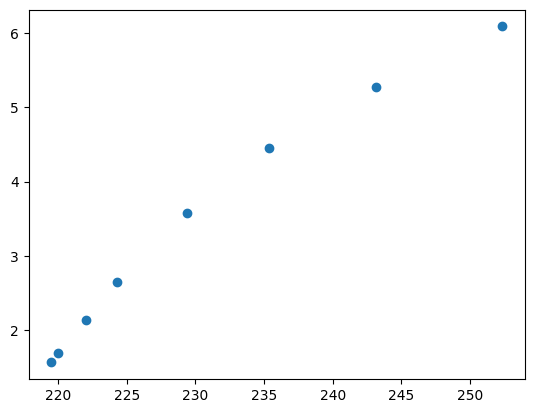

In [15]:
plt.plot(mean_vals, var_vals, 'o')
plt.show()